In [1]:
import warnings, pandas, numpy, dna

from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /home/carlos.cayres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/carlos.cayres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
warnings.filterwarnings(action='ignore')
pyplot.rcParams['figure.figsize'] = (14, 8)
pandas.set_option('display.max_colwidth', 135)

In [3]:
labeled_path = 'CSVs/linkedin_posts/labeled_translated.csv'
unlabeled_path = 'CSVs/linkedin_posts/unlabeled_translated.csv'

labeled_result_path = 'CSVs/linkedin_posts/labeled_processed.csv'

In [4]:
df_labeled = pandas.read_csv(labeled_path, parse_dates=[3])

df_labeled.rename(columns={
    'Tipo': 'tipo',
    'Assunto': 'assunto',
    'Modelo': 'modelo'
}, inplace=True)

print('Records: {}'.format(len(df_labeled)))

Records: 1323


In [5]:
df_unlabeled = pandas.read_csv(unlabeled_path, parse_dates=[3])
print('Records: {}'.format(len(df_unlabeled)))

Records: 544


In [6]:
df = pandas.concat([df_labeled, df_unlabeled])

# Tipo
df.loc[df['tipo'] == 'employer branding', 'tipo'] = 'Employer Branding'
df.loc[df['tipo'] == 'Branding', 'tipo'] = 'Employer Branding'
df.loc[df['tipo'] == 'branding', 'tipo'] = 'Employer Branding'
df.loc[df['tipo'] == 'crescimento', 'tipo'] = 'Crescimento'
df.loc[df['tipo'] == 'negócios', 'tipo'] = 'Négocios'
df.loc[df['tipo'] == 'Négocio', 'tipo'] = 'Négocios'
df.loc[df['tipo'] == 'técnico', 'tipo'] = 'Conteúdo Técnico'
df.loc[df['tipo'] == 'Técnico', 'tipo'] = 'Conteúdo Técnico'
df.loc[df['assunto'] == 'Rebranding da Marca', 'tipo'] = 'Crescimento'

# Assunto
df.loc[df['assunto'] == 'Carreiras', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'anti carreira', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'Desenvolvimento profissional', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'desenvolvimento pessoal', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'carreira', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'Estágio', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'Programa de Estágio', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'estágio', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'programa estágio', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'programa de estágio', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'Bootcamp carreira', 'assunto'] = 'Carreira'
df.loc[df['assunto'] == 'entrevista', 'assunto'] = 'Carreira'

df.loc[df['assunto'] == 'Divrsidade', 'assunto'] = 'Diversidade'
df.loc[df['assunto'] == 'diversidade + vagas', 'assunto'] = 'Diversidade'
df.loc[df['assunto'] == 'inclusão', 'assunto'] = 'Diversidade'
df.loc[df['assunto'] == 'inclusão + vagas', 'assunto'] = 'Diversidade'
df.loc[df['assunto'] == 'diversidade', 'assunto'] = 'Diversidade'
df.loc[df['assunto'] == 'racismo', 'assunto'] = 'Diversidade'
df.loc[df['assunto'] == 'diversidade e inclusão', 'assunto'] = 'Diversidade'
df.loc[df['assunto'] == 'causa LGBTI+', 'assunto'] = 'Diversidade'

df.loc[df['assunto'] == 'empregabilidade', 'assunto'] = 'Vagas'
df.loc[df['assunto'] == 'contratação executivo', 'assunto'] = 'Vagas'
df.loc[df['assunto'] == 'vagas', 'assunto'] = 'Vagas'
df.loc[df['assunto'] == 'Vaga', 'assunto'] = 'Vagas'

df.loc[df['assunto'] == 'Digital', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Fundação everis', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'GPTW', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Gestão de Acessos', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Hackathon', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'HO', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Inovação', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Liderança', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Metodologia', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Outubro Rosa', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Setembro Amarelo', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'academia invillia', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'cultura da empresa', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'benefícios', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'conectividade', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'conferência', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Digital Conference', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'cultura da empresa', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'diferenciais', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'inovação', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'liderança', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'propósito', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Benefícios', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Causas sociais', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Comunicação Não violenta', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Dia do Profissional de TI', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Empatia', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'data comemorativa', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'datas comemorativas', 'assunto'] = 'Marca'
df.loc[df['assunto'] == 'Cultura', 'assunto'] = 'Marca'

df.loc[df['assunto'] == 'Trabalho remoto', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'autocuidado', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'home office', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'qualidade de vida', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'stress', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'trabalho remoto', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'trabalho conectado', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'pandemia', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'Serviço 100% remoto', 'assunto'] = 'Trabalho Remoto'
df.loc[df['assunto'] == 'Modelo de trabalho', 'assunto'] = 'Trabalho Remoto'

df.loc[(df['assunto'] == 'Employer Branding') & (df['assunto'] == 'Marca'), 'tipo'] = 'Crescimento'
df.loc[df['tipo'] == 'Crescimento', 'assunto'] = 'Crescimento'
df.loc[(df['tipo'] == 'Employer Branding') & (~df['assunto'].isin(['Carreira','Diversidade','Marca','Trabalho Remoto','Vagas'])), 'assunto'] = 'Variados'

ux = [ # Variados
    'impactos da pandemia',
    'Gestão de Pessoas',
    'Artigo',
    'plataforma digital n ',
    'série',
    'desenvolvimento ágil',
    'CLI',
    'força do campo'
]
df.loc[df['assunto'].isin(ux), 'assunto'] = 'Variados'

df.loc[df['assunto'] == 'Transformação Digtal', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'agile transformation', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'acelerar', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'estratégia digital', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'industrialização digital', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'experiencia digital', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'experiência digital', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'plataforma digital', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'plataformas digitais', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'transformação digital', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'transforação digital', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'transformação', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'transformação além da tecnologia', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'Digital Evolution', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'aceleradores', 'assunto'] = 'Transformação Digital'
df.loc[df['assunto'] == 'Convergência digital', 'assunto'] = 'Transformação Digital'

df.loc[df['assunto'] == 'tendências', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'tendência', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'tendências de comportamento', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'tendências de mercado', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'transformações do mercado', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'Inovação, tecnologia e negócio', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'Relação do Consumidor', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'competitividade', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'criatividade', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'tendências de Cloud', 'assunto'] = 'Tendências'
df.loc[df['assunto'] == 'migração para cloud', 'assunto'] = 'Tendências'

df.loc[df['assunto'].isin(['métricas','Cognitive Contact Cente','descentralização de dados','agente virtual','automação inteligente','big data','LGPD','Dados','growth','inteligencia artifical','inteligência artificial','power BI','curso power BI','dados','dados para desenhar a melhor experiência do cliente','data science','governança de dados','governça de dados','growth product','estudo inteligência artificial','aprendizado de máquinas','armazenamento de dados']), 'assunto'] = 'Dados'

sm = [ # Segmento de Mercado
    'mercado de seguros',
    'mercado financeiro',
    'open banking',
    'seguradoras',
    'setor bancário',
    'setor de bens de consumo',
    'setor financeiro',
    'setor health',
    'startup',
    'startups',
    'telecom',
    'ecommerce',
    'empreendedorismo',
    'equality',
    'health',
    'Open Banking no Brasil',
    'Open Innovation Contest',
    'Site Reliability Engineering',
    'Masterclass Transformation Stack',
    'NTT Research Virtual Summit',
    'Impacto Estratégico de Compras (Procurement That Flows)',
    'bancos',
    'mercado de bens de consumo'
]
df.loc[df['assunto'].isin(sm), 'assunto'] = 'Segmentos de Mercado'

ct = [ # Conteudo Tecnico
    'Agile',
    'Agilidade',
    'Agilidade em tempos remotos',
    'CX',
    'Catalyst Digital',
    'Catalyst Digital Showcase',
    'LinkedIn',
    'OKR',
    'PIX',
    'Refatoração',
    'UX',
    'Workshop',
    'agile business',
    'agilidade',
    'automação',
    'automação de testes mobile',
    'cloud',
    'competências digitais',
    'cultura ágill',
    'desafios culturais da automatização',
    'design',
    'ferramenta liguistica',
    'implantação da rede #5G',
    'infraestrutura da computação',
    'instalações',
    'instancias',
    'microsoft',
    'revista - segurança cibernética',
    'segurança cibernética',
    'serviço de campo',
    'super apps',
    'Ágil',
    'ágil',
    'Android',
    'Angular',
    'Automação de Processos',
    'Blockchain',
    'Bootcamp Design',
    'Business Agility',
    'Computação Espacial',
    'Continuous Deployment no Facebook Scale',
    'Design',
    'Design Thinking',
    'Devops',
    'Extreme Programming (XP)',
    'Flutter',
    'GPG',
    'Gestão de Acessos (foco Segurança)',
    'Hybrid Operations',
    'IoT',
    'Iot no setor Health',
    'Java',
    'Java 14 com Spring',
    'Kotlin',
    'Mobile',
    'Server-Driven UI',
    'MongoDB',
    'Testes',
    'bibliotecas para APIs RESTful',
    'The Twelve-Factor App',
    'automação virtual',
    'bibliotecas para APIs RESTful com OpenAPI',
    'boas praticas entre os devs',
    'commits',
    'computação espacial',
    'cultura ágil',
    'desenvolvimento de plataformas',
    'desenvolvimento ágil',
    'devops',
    'python',
    'instalação de SDK do Firebase',
    'profissionais de qualidade de software',
    'Open Source',
    'Plataformas',
    'SRE',
    'Service Mesh',
    'Tecnologia',
    'desenvolvimento ágil',
    'eventos',
    'ferramentas',
    'flutter',
    'gestão de pessoas',
    'kanban',
    'scrum master',
    'testes',
    'privacyops',
    'desenvolvimento ágil',
    'tecnologia com propósito',
    'tecnologias',
    'plataformas tecnológicas',
    'desenvolvimento ágil',
    'microserviços',
    'plataforma digital n',
    'desenvolvimento ágil '
]
df.loc[df['assunto'].isin(ct), 'assunto'] = 'Conteúdo Técnico'

ev = [ # Eventos
    'DevCamp ',
    'Live',
    'Live Internacional',
    'Lives',
    'Live ',
    'Post sobre a Live',
    'Prêmio Empreenda Saúde',
    'Prêmio da Empresa Mais Digital de 2020',
    'chamada para evento',
    'ciab live 2020',
    'evento - Healthcare Innovation Show',
    'evento online',
    'everistalk',
    'prêmio empreenda saúde',
    'premio empreenda saúde',
    'premiação',
    'patrocinio Healthcare Innovation Show',
    'participação evento',
    'cursos',
    'treinamento de quipe',
    'ES2020',
    'Meetup iOS',
    'TDC',
    'bootcamp',
    'chamada para Hackathon',
    'particpação evento',
    'Workshop de Discovery',
    'lançamento blog técnico',
    'live coding'
]
df.loc[df['assunto'].isin(ev), 'assunto'] = 'Eventos'

ux = [ # Experiencia do Usuario
    'comportamento do consumidor',
    'comportamento do usuário',
    'consumidor moderno',
    'experiencia do cliente',
    'experiencia do usuário',
    'experiência do usuário',
    'desafios de UX em bancos',
    'Acessibilidade',
    'acessibilidade em produtos',
    'experiencia spotify',
    'produto',
    'produto ',
    'Acessibilidade Digital',
    'acessibilidade',
]
df.loc[df['assunto'].isin(ux), 'assunto'] = 'UX'

nones = [
    'Conteúdo Técnico',
    'Dados',
    'Diversidade',
    'Eventos',
    'Marca',
    'Segmentos de Mercado',
    'Tendências',
    'Trabalho Remoto',
    'Transformação Digital'
]
df.loc[(df['tipo'] == 'Négocios') & (~df['assunto'].isin(nones)), 'assunto'] = None

print('Records: {}'.format(len(df)))

Records: 1867


In [7]:
df['assunto'].value_counts()

Variados                       139
IOT                             17
Conteúdo Técnico                15
AI                               5
Augmented Coding                 5
Augmented Collaboration          4
Augmented Coding                 4
Trabalho Remoto                  4
Crescimento                      3
Tendencias sobre Tecnologia      2
Cloud                            2
Digital Marketing                1
Artificial Intelligence          1
Developer                        1
Inclusão e Carreira              1
Agile                            1
Software Development             1
Divulgação de Demo               1
Estudo sobre tecnologia          1
Augmented Collaboration          1
Software Development             1
Demo                             1
Big Data                         1
Name: assunto, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 543
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   company           1867 non-null   object        
 2   post_title        0 non-null      float64       
 3   post_date         1867 non-null   datetime64[ns]
 4   post_text         1860 non-null   object        
 5   post_likes        1867 non-null   int64         
 6   post_comments     1867 non-null   int64         
 7   post_video_views  1867 non-null   int64         
 8   post_hashtags     1466 non-null   object        
 9   origin            1867 non-null   object        
 10  tipo              267 non-null    object        
 11  modelo            325 non-null    object        
 12  assunto           212 non-null    object        
 13  language          1867 non-null   object        
 14  post_text_pt      1867 no

In [9]:
print('Assuntos: {}'.format(df['assunto'].value_counts().count()))

Assuntos: 23


<AxesSubplot:xlabel='post_date'>

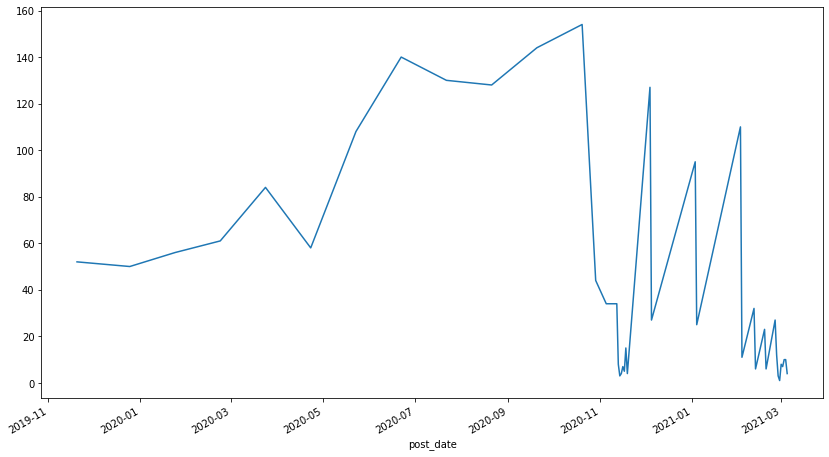

In [10]:
df.groupby(['post_date'])['id'].count().plot.line()

In [11]:
df[['post_text_pt']].head()

,post_text_pt
0,Welcome aboard!Arthur Pesco - Antonio Gloria - Ernesto Hernandez - Alexandre Shimono - Matheus Lisboa de Barros#NewTeam'
1,"Não perca a oportunidade de se tornar nosso parceiro. É simples, basta introduzir um contato com as necessidades de Desenvolvimento..."
2,Estamos procurando desenvolvedores do Shopify para se juntar a nós! • Mais de 6 anos de experiência trabalhando com diferentes tecn...
3,O futuro do varejo está aqui. Descubra as 6 tendências que estão remodelando o futuro da indústria e como nossos desenvolvedores po...
4,"A pandemia empurrou todas as indústrias para a aceleração digital, e os profissionais de marketing em todos os lugares têm adotado ..."


In [12]:
df['text'] = df['post_text_pt'].astype(str)
df['assunto'] = df['assunto'].astype(str)

df['text'] = df['post_text_pt'].apply(lambda x : dna.strip(str(x)))

df = df[df['assunto'] != 'nan']

df[['text']].head()

,text
2,procurando desenvolvedores shopify juntar 6 anos experiencia trabalhando diferentes tecnologias 5 anos experiencia trabalhando tecn...
6,procura desenvolvedores python juntarem equipe 5 anos experiencia pratica desenvolvimento python django 3 anos desenvolvimento usan...
9,procura magento 2 developers juntar 5 anos experiencia magento fortes habilidades php javascript html css mysql solido conhecimento...
18,procura desenvolvedores vuejs juntarem 5 anos experiencia desenvolvimento software 3 anos experiencia desenvolvimento vuejs fortes ...
20,procura desenvolvedores nodejs juntarem equipe 5 anos experiencia desenvolvimento node experiencia video hls excelente dominio ingl...


In [13]:
df_tra = df.sample(frac=0.6, random_state=42)
df_tra['assunto'].value_counts()

Variados                   91
IOT                        11
Conteúdo Técnico            7
Augmented Coding            3
Augmented Coding            3
Trabalho Remoto             2
AI                          1
Augmented Collaboration     1
Cloud                       1
Artificial Intelligence     1
Developer                   1
Inclusão e Carreira         1
Software Development        1
Agile                       1
Crescimento                 1
Digital Marketing           1
Name: assunto, dtype: int64

In [14]:
df_tes = df.drop(df_tra.index)
df_tes['assunto'].value_counts()

Variados                       48
Conteúdo Técnico                8
IOT                             6
AI                              4
Augmented Collaboration         3
Tendencias sobre Tecnologia     2
Augmented Coding                2
Trabalho Remoto                 2
Crescimento                     2
Cloud                           1
Augmented Coding                1
Estudo sobre tecnologia         1
Big Data                        1
Demo                            1
Software Development            1
Augmented Collaboration         1
Divulgação de Demo              1
Name: assunto, dtype: int64

In [15]:
documents = df_tra['text'].values

vectorizer = TfidfVectorizer(
    min_df=5,
    max_df=0.7,
    ngram_range=(1, 3),
    max_features=800,
    stop_words=['a','o','de','do','da']
).fit(documents)

vectorizer

TfidfVectorizer(max_df=0.7, max_features=800, min_df=5, ngram_range=(1, 3),
                stop_words=['a', 'o', 'de', 'do', 'da'])

In [16]:
X_tra = vectorizer.transform(documents)
y_tra = df_tra['assunto'].values

sampler = RandomOverSampler(random_state=42)
X_over, y_over = sampler.fit_resample(X_tra, y_tra)

params = {
    'multi_class': ['ovr', 'multinomial'],
    'solver': ['lbfgs', 'saga'],
    'class_weight': ['balanced']
}

kfold = KFold(n_splits=3, shuffle=True, random_state=42)

classifier = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=params,
    n_iter=10,
    scoring='f1_micro',
    cv=kfold,
).fit(X_over, y_over)

classifier = classifier.best_estimator_
classifier

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=42)

In [17]:
X_tes = vectorizer.transform(df_tes['text'].values)
y_tes = df_tes['assunto'].values

y_prd = classifier.predict(X_tes)
print(classification_report(y_tes, y_prd))

                             precision    recall  f1-score   support

                         AI       0.00      0.00      0.00         4
                     Agile        0.00      0.00      0.00         0
           Augmented Coding       0.14      0.50      0.22         2
          Augmented Coding        0.00      0.00      0.00         1
    Augmented Collaboration       0.00      0.00      0.00         3
   Augmented Collaboration        0.00      0.00      0.00         1
                   Big Data       0.00      0.00      0.00         1
                      Cloud       0.00      0.00      0.00         1
           Conteúdo Técnico       0.50      0.25      0.33         8
                Crescimento       1.00      0.50      0.67         2
                       Demo       0.00      0.00      0.00         1
          Digital Marketing       0.00      0.00      0.00         0
         Divulgação de Demo       0.00      0.00      0.00         1
    Estudo sobre tecnologia      

In [18]:
df_complete = pandas.concat([df_labeled, df_unlabeled])

df_complete['text'] = df_complete['post_text_pt'].astype(str)
df_complete['assunto'] = df_complete['assunto'].astype(str)

df_complete['text'] = df_complete['post_text_pt'].apply(lambda x : dna.strip(str(x)))

X_out = vectorizer.transform(df_complete['text'].values)

df_complete['assunto'] = classifier.predict(X_out)

In [19]:
df_complete['assunto'].value_counts()

Variados                   1434
IOT                          77
Augmented Coding             76
Trabalho Remoto              70
Conteúdo Técnico             64
Digital Marketing            42
Software Development         23
Cloud                        17
Crescimento                  11
Augmented Collaboration      10
Augmented Coding             10
Agile                         9
Artificial Intelligence       7
Inclusão e Carreira           6
Developer                     6
AI                            5
Name: assunto, dtype: int64

In [20]:
df_complete

,id,company,post_title,post_date,post_text,post_likes,post_comments,post_video_views,post_hashtags,origin,...,modelo,assunto,language,post_text_pt,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 12,text
0,1,bairesdev,NaN,2020-11-19,Welcome aboard!Arthur Pesco - Antonio Gloria - Ernesto Hernandez - Alexandre Shimono - Matheus Lisboa de Barros#NewTeam',43,2,0,#NewTeam',linkedin,...,NaN,Variados,en,Welcome aboard!Arthur Pesco - Antonio Gloria - Ernesto Hernandez - Alexandre Shimono - Matheus Lisboa de Barros#NewTeam',NaN,NaN,NaN,NaN,NaN,welcome aboardarthur pesco antonio gloria ernesto hernandez alexandre shimono matheus lisboa barrosnewteam
1,2,bairesdev,NaN,2020-11-19,"Don’t miss the opportunity to become our partner. It’s simple, just introduce a contact with Software Development needs, and if we ...",19,1,0,"#Partners, #SoftwareDevelopment'",linkedin,...,NaN,Software Development,en,"Não perca a oportunidade de se tornar nosso parceiro. É simples, basta introduzir um contato com as necessidades de Desenvolvimento...",NaN,NaN,NaN,NaN,NaN,perca oportunidade tornar parceiro simples basta introduzir contato necessidades desenvolvimento software comecarmos trabalhar proj...
2,3,bairesdev,NaN,2020-11-18,We are looking for Shopify Developers to join us!• 6+ years of experience working with different technologies.• 5+ years of experie...,21,0,0,"#JobSearch, #Shopify'",linkedin,...,post,Variados,en,Estamos procurando desenvolvedores do Shopify para se juntar a nós! • Mais de 6 anos de experiência trabalhando com diferentes tecn...,NaN,NaN,NaN,NaN,NaN,procurando desenvolvedores shopify juntar 6 anos experiencia trabalhando diferentes tecnologias 5 anos experiencia trabalhando tecn...
3,5,bairesdev,NaN,2020-11-18,The future of retail is here. Discover the 6 trends that are reshaping the industry’s future and how can our developers revolutioni...,21,0,0,NaN,linkedin,...,NaN,Variados,en,O futuro do varejo está aqui. Descubra as 6 tendências que estão remodelando o futuro da indústria e como nossos desenvolvedores po...,NaN,NaN,NaN,NaN,NaN,futuro varejo aqui descubra 6 tendencias remodelando futuro industria desenvolvedores podem revolucionar negociohttps lnkdindxsjwqw 39
4,8,bairesdev,NaN,2020-11-18,"The pandemic has pushed all industries towards digital acceleration, and marketers everywhere have increasingly adopted new technol...",22,0,0,"#MarTech, #Technology'",linkedin,...,artigo,IOT,en,"A pandemia empurrou todas as indústrias para a aceleração digital, e os profissionais de marketing em todos os lugares têm adotado ...",NaN,NaN,NaN,NaN,NaN,pandemia empurrou todas industrias aceleracao digital profissionais marketing todos lugares adotado cada novas tecnologias atender ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0,softexnacional,NaN,2021-03-04,'🎧🎙 Episódio #01 #TIcomElas no ar: softex.br/spotifyRafaela Basseti é a primeira entrevistada da nossa série em homenagem ao mês da...,16,0,0,"#01, #TIcomElas",linkedin,...,NaN,AI,pt,'🎧🎙 Episódio #01 #TIcomElas no ar: softex.br/spotifyRafaela Basseti é a primeira entrevistada da nossa série em homenagem ao mês da...,NaN,NaN,NaN,NaN,NaN,episodio 01 ticomelas ar softexbrspotifyrafaela basseti primeira entrevistada serie homenagem mes mulheresquando assunto cresciment...
540,1,dextra-technologies,NaN,2021-03-05,NaN,0,0,0,NaN,linkedin,...,NaN,Variados,tl,no,NaN,NaN,NaN,NaN,NaN,
541,0,globant,NaN,2021-03-05,"'El próximo #8marzo tenemos una cita con #GirlsinTechSpain. No te pierdas el evento ""Mujeres en #Tecnología: Re-escribiendo la Hist...",124,4,0,"#8marzo, #GirlsinTechSpain., #Tecnología:, #Globant.¡Consigue, #8MarzoReescribeLaHistoria, #MujeresTech, #8M'",linkedin,...,NaN,Variados,es,"&#39;No próximo # 8 de março, temos um encontro com #GirlsinTechSpain. Não perca o evento &quot;Mulheres na #Tecnologia: Reescreven...",NaN,NaN,NaN,NaN,NaN,39no proximo 8 marco encontro girlsintechspain perca evento quotmulheres tecnologia reescrevendo hi

In [21]:
cols = [
    'id',
    'company',
    'post_title',
    'post_date',
    'post_text',
    'post_text_pt',
    'post_likes',
    'post_comments',
    'post_hashtags',
    'assunto',
    'modelo',
    'tipo',
]

df_result = df_complete[cols]
df_result

,id,company,post_title,post_date,post_text,post_text_pt,post_likes,post_comments,post_hashtags,assunto,modelo,tipo
0,1,bairesdev,NaN,2020-11-19,Welcome aboard!Arthur Pesco - Antonio Gloria - Ernesto Hernandez - Alexandre Shimono - Matheus Lisboa de Barros#NewTeam',Welcome aboard!Arthur Pesco - Antonio Gloria - Ernesto Hernandez - Alexandre Shimono - Matheus Lisboa de Barros#NewTeam',43,2,#NewTeam',Variados,NaN,NaN
1,2,bairesdev,NaN,2020-11-19,"Don’t miss the opportunity to become our partner. It’s simple, just introduce a contact with Software Development needs, and if we ...","Não perca a oportunidade de se tornar nosso parceiro. É simples, basta introduzir um contato com as necessidades de Desenvolvimento...",19,1,"#Partners, #SoftwareDevelopment'",Software Development,NaN,NaN
2,3,bairesdev,NaN,2020-11-18,We are looking for Shopify Developers to join us!• 6+ years of experience working with different technologies.• 5+ years of experie...,Estamos procurando desenvolvedores do Shopify para se juntar a nós! • Mais de 6 anos de experiência trabalhando com diferentes tecn...,21,0,"#JobSearch, #Shopify'",Variados,post,employer branding
3,5,bairesdev,NaN,2020-11-18,The future of retail is here. Discover the 6 trends that are reshaping the industry’s future and how can our developers revolutioni...,O futuro do varejo está aqui. Descubra as 6 tendências que estão remodelando o futuro da indústria e como nossos desenvolvedores po...,21,0,NaN,Variados,NaN,NaN
4,8,bairesdev,NaN,2020-11-18,"The pandemic has pushed all industries towards digital acceleration, and marketers everywhere have increasingly adopted new technol...","A pandemia empurrou todas as indústrias para a aceleração digital, e os profissionais de marketing em todos os lugares têm adotado ...",22,0,"#MarTech, #Technology'",IOT,artigo,negócios
...,...,...,...,...,...,...,...,...,...,...,...,...
539,0,softexnacional,NaN,2021-03-04,'🎧🎙 Episódio #01 #TIcomElas no ar: softex.br/spotifyRafaela Basseti é a primeira entrevistada da nossa série em homenagem ao mês da...,'🎧🎙 Episódio #01 #TIcomElas no ar: softex.br/spotifyRafaela Basseti é a primeira entrevistada da nossa série em homenagem ao mês da...,16,0,"#01, #TIcomElas",AI,NaN,NaN
540,1,dextra-technologies,NaN,2021-03-05,NaN,no,0,0,NaN,Variados,NaN,NaN
541,0,globant,NaN,2021-03-05,"'El próximo #8marzo tenemos una cita con #GirlsinTechSpain. No te pierdas el evento ""Mujeres en #Tecnología: Re-escribiendo la Hist...","&#39;No próximo # 8 de março, temos um encontro com #GirlsinTechSpain. Não perca o evento &quot;Mulheres na #Tecnologia: Reescreven...",124,4,"#8marzo, #GirlsinTechSpain., #Tecnología:, #Globant.¡Consigue, #8MarzoReescribeLaHistoria, #MujeresTech, #8M'",Variados,NaN,NaN
542,1,globant,NaN,2021-03-05,NaN,no,0,0,NaN,Variados,NaN,NaN


In [22]:
df_result = df_complete[cols].drop_duplicates(subset=['post_text'])
df_result

,id,company,post_title,post_date,post_text,post_text_pt,post_likes,post_comments,post_hashtags,assunto,modelo,tipo
0,1,bairesdev,NaN,2020-11-19,Welcome aboard!Arthur Pesco - Antonio Gloria - Ernesto Hernandez - Alexandre Shimono - Matheus Lisboa de Barros#NewTeam',Welcome aboard!Arthur Pesco - Antonio Gloria - Ernesto Hernandez - Alexandre Shimono - Matheus Lisboa de Barros#NewTeam',43,2,#NewTeam',Variados,NaN,NaN
1,2,bairesdev,NaN,2020-11-19,"Don’t miss the opportunity to become our partner. It’s simple, just introduce a contact with Software Development needs, and if we ...","Não perca a oportunidade de se tornar nosso parceiro. É simples, basta introduzir um contato com as necessidades de Desenvolvimento...",19,1,"#Partners, #SoftwareDevelopment'",Software Development,NaN,NaN
2,3,bairesdev,NaN,2020-11-18,We are looking for Shopify Developers to join us!• 6+ years of experience working with different technologies.• 5+ years of experie...,Estamos procurando desenvolvedores do Shopify para se juntar a nós! • Mais de 6 anos de experiência trabalhando com diferentes tecn...,21,0,"#JobSearch, #Shopify'",Variados,post,employer branding
3,5,bairesdev,NaN,2020-11-18,The future of retail is here. Discover the 6 trends that are reshaping the industry’s future and how can our developers revolutioni...,O futuro do varejo está aqui. Descubra as 6 tendências que estão remodelando o futuro da indústria e como nossos desenvolvedores po...,21,0,NaN,Variados,NaN,NaN
4,8,bairesdev,NaN,2020-11-18,"The pandemic has pushed all industries towards digital acceleration, and marketers everywhere have increasingly adopted new technol...","A pandemia empurrou todas as indústrias para a aceleração digital, e os profissionais de marketing em todos os lugares têm adotado ...",22,0,"#MarTech, #Technology'",IOT,artigo,negócios
...,...,...,...,...,...,...,...,...,...,...,...,...
532,16,globant,NaN,2021-03-04,'Do you know how to overcome the new reality? Technology is here to stay and we want you to be prepared and to fully develop your t...,&#39;Você sabe como superar a nova realidade? A tecnologia veio para ficar e queremos que você esteja preparado e desenvolva totalm...,81,0,"#TechTrends, #Innovation, #Technology, #Business'",Variados,NaN,NaN
534,3,globant,NaN,2021-03-04,"Get to know the winner of the Rising Star Award of the #WomenThatBuild #GlobantAwards, Sindey Carolina Bernal, and learn how she be...","Conheça a vencedora do prêmio Rising Star do #WomenThatBuild #GlobantAwards, Sindey Carolina Bernal, e saiba como ela se tornou uma...",27,0,"#WomenThatBuild, #GlobantAwards,, #InspiringStories, #WomenMonthhttps://bit.ly/3eeS7Vn'",Variados,NaN,NaN
535,5,globant,NaN,2021-03-04,"""Durante 2020 se entregaron diariamente una media de 150 millones de paquetes. Sólo una #logística inteligente, integrada, eficient...","“Durante 2020, uma média de 150 milhões de pacotes foram entregues diariamente. Somente #logística inteligente, integrada, eficient...",48,0,"#logística, #sostenible, #últimamilla., #retail, #ecommerce, #transformacióndigital, #digitalización'",Variados,NaN,NaN
539,0,softexnacional,NaN,2021-03-04,'🎧🎙 Episódio #01 #TIcomElas no ar: softex.br/spotifyRafaela Basseti é a primeira entrevistada da nossa série em homenagem ao mês da...,'🎧🎙 Episódio #01 #TIcomElas no ar: softex.br/spotifyRafaela Basseti é a primeira entrevistada da nossa série em homenagem ao mês da...,16,0,"#01, #TIcomElas",AI,NaN,NaN


In [23]:
df_result.to_csv(labeled_result_path, header=True, index=False)